In [73]:
### Bangalore Car
import pandas as pd
import ast

# Load the Excel file
file_path = 'C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/bangalore_cars.xlsx'
df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
Bangalore_Car_df = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
Bangalore_Car_df.to_csv('bangalore.csv', index=False)

# Optionally, print a few rows to verify
Bangalore_Car_df.head()


,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Miscellaneous_Front Brake Type,Miscellaneous_Rear Brake Type,Miscellaneous_Top Speed,Miscellaneous_Acceleration,Miscellaneous_Tyre Type,Miscellaneous_No Door Numbers,Miscellaneous_Cargo Volumn,Spec_Top_Wheel Size,Miscellaneous_Alloy Wheel Size,Dimensions & Capacity_Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN
1,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN
2,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN
3,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN
4,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN


In [74]:
### Chennai Car
import pandas as pd
import ast

# Load the Excel file
file_path = "C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/chennai_cars.xlsx"
df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
df_final = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
df_final.head()

df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
Chennai_car_df = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
Chennai_car_df.head()


,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Engine and Transmission_Compression Ratio,Engine and Transmission_Super Charger,Dimensions & Capacity_Front Tread,Dimensions & Capacity_Rear Tread,Dimensions & Capacity_Gross Weight,Miscellaneous_Turning Radius,Miscellaneous_Top Speed,Miscellaneous_Acceleration,Engine and Transmission_BoreX Stroke,Dimensions & Capacity_Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,...,9.9:1,No,1280mm,1290mm,1540kg,4.5 metres,145 Kmph,15.7 Seconds,NaN,NaN
2,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,...,NaN,No,NaN,NaN,NaN,5.0,NaN,11.7,72.2 x 81.3,NaN
3,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,...,NaN,No,1400mm,1385mm,NaN,4.7 metres,165 Kmph,14.3 Seconds,NaN,NaN
4,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,...,NaN,No,NaN,NaN,NaN,5.1 meters,172 Kmph,13.7 Seconds,NaN,NaN


In [75]:
### Hyderabad Car
import pandas as pd
import ast

# Load the Excel file
file_path = "C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/hyderabad_cars.xlsx"
df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
df_final = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
df_final.head()

df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
hyderabad_cars_df = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
hyderabad_cars_df.head()


,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Miscellaneous_Turning Radius,Miscellaneous_Front Brake Type,Miscellaneous_Rear Brake Type,Miscellaneous_Tyre Type,Miscellaneous_Alloy Wheel Size,Miscellaneous_No Door Numbers,Miscellaneous_Cargo Volumn,Miscellaneous_Top Speed,Miscellaneous_Acceleration,Dimensions & Capacity_Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,...,4.9,Disc,Drum,"Tubeless,Radial",R16,5,280,NaN,NaN,NaN
1,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,...,4.6 metres,Disc,Drum,Tubeless,NaN,5,215-litres,135 Kmph,19 Seconds,NaN
2,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,...,NaN,Disc,Drum,"Tubeless, Radial",NaN,5,NaN,NaN,NaN,NaN
3,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,...,4.9 meters,Disc,Drum,"Tubeless,Radial",16,5,339-litres,180 Kmph,12.36 seconds,NaN
4,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,...,NaN,Disc,Drum,"Radial, Tubeless",18,3,NaN,NaN,NaN,NaN


In [76]:
### Delhi cars
import pandas as pd
import ast

# Load the Excel file
file_path = "C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/delhi_cars.xlsx"
df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
df_final = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
df_final.head()

df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
delhi_cars_df = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
delhi_cars_df.head()


,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Engine and Transmission_Super Charger,Miscellaneous_Turning Radius,Miscellaneous_Top Speed,Miscellaneous_Acceleration,Dimensions & Capacity_Gross Weight,Dimensions & Capacity_Front Tread,Dimensions & Capacity_Rear Tread,Engine and Transmission_BoreX Stroke,Engine and Transmission_Compression Ratio,Dimensions & Capacity_Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,...,No,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,...,NaN,NaN,217 Kmph,NaN,2360kg,NaN,NaN,NaN,NaN,NaN
3,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,...,NaN,4.8,NaN,NaN,1335,1530,1530,NaN,NaN,NaN
4,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,...,No,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
### Jaipur Car
import pandas as pd
import ast

# Load the Excel file
file_path = "C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/jaipur_cars.xlsx"
df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
df_final = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
df_final.head()

df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
jaipur_cars_df = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
jaipur_cars_df.head()


,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Miscellaneous_Top Speed,Miscellaneous_Acceleration,Miscellaneous_Tyre Type,Miscellaneous_Alloy Wheel Size,Miscellaneous_No Door Numbers,Miscellaneous_Cargo Volumn,Dimensions & Capacity_Gross Weight,Engine and Transmission_BoreX Stroke,Engine and Transmission_Compression Ratio,Dimensions & Capacity_Ground Clearance Unladen
0,https://www.cardekho.com/used-car-details/used...,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,...,180 Kmph,11.9 Seconds,Tubeless,16,5,295-litres,NaN,NaN,NaN,NaN
1,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,...,NaN,NaN,"Radial, Tubeless",NaN,5,268,1335,NaN,NaN,NaN
2,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",NaN,5,235-litres,1250kg,73 X 82 mm,11.0:1,NaN
3,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,...,165 Kmph,12.9 Seconds,Tubeless,NaN,5,256,NaN,NaN,NaN,NaN
4,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,...,152 kmph,18.6 Seconds,Tubeless Tyres,NaN,5,180-liters,1350kg,69 x 72 mm,NaN,NaN


In [78]:
### Kolkata Car
import pandas as pd
import ast

# Load the Excel file
file_path = "C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/kolkata_cars.xlsx"
df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
df_final = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
df_final.head()

df = pd.read_excel(file_path)


### 1. Transformation for 'new_car_detail' column ###

# Convert string representations of dictionaries into actual Python dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)

# Flatten 'new_car_detail' into separate structured columns
car_details_flat = pd.json_normalize(df['new_car_detail'])

### 2. Transformation for 'new_car_overview' column ###

# Parse the 'new_car_overview' column from strings to dictionaries
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)

# Convert the 'top' dictionary into separate structured columns
def transform_overview(row):
    result = {}
    for item in row['top']:
        result[item['key']] = item['value']
    return result

# Apply the transformation to each row in the 'new_car_overview' column
df_overview_transformed = pd.DataFrame(df['new_car_overview'].apply(transform_overview).tolist())

### 3. Transformation for 'new_car_feature' column ###

# Function to transform the 'top' list into structured columns
def transform_top_features(top_list):
    result = {}
    for i, item in enumerate(top_list):
        result[f'Top_Feature_{i+1}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_features(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_name = feature['value']
            result[f"{section_heading}_{feature_name}"] = 1  # Mark feature as available
    return result

# Apply the transformation to the 'new_car_feature' column
def transform_car_features(car_features):
    car_dict = ast.literal_eval(car_features)
    top_transformed = transform_top_features(car_dict.get('top', []))
    data_transformed = transform_data_features(car_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_features_transformed = pd.DataFrame(df['new_car_feature'].apply(transform_car_features).tolist())

### 4. Transformation for 'new_car_specs' column ###

# Function to transform the 'top' list into structured columns
def transform_top_specs(top_list):
    result = {}
    for item in top_list:
        result[f'Spec_Top_{item["key"]}'] = item['value']
    return result

# Function to transform the 'data' list into structured columns
def transform_data_specs(data_list):
    result = {}
    for section in data_list:
        section_heading = section['heading']
        for feature in section['list']:
            feature_key = feature['key']
            feature_value = feature['value']
            result[f"{section_heading}_{feature_key}"] = feature_value
    return result

# Apply the transformation to the 'new_car_specs' column
def transform_new_car_specs(new_car_specs):
    car_spec_dict = ast.literal_eval(new_car_specs)
    top_transformed = transform_top_specs(car_spec_dict.get('top', []))
    data_transformed = transform_data_specs(car_spec_dict.get('data', []))
    combined_data = {**top_transformed, **data_transformed}
    return combined_data

# Apply the transformation
df_specs_transformed = pd.DataFrame(df['new_car_specs'].apply(transform_new_car_specs).tolist())

### Combine all the transformed data ###

# Drop the original columns containing dictionaries
kolkata_cars_df = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']),
                      car_details_flat, df_overview_transformed, df_features_transformed, df_specs_transformed], axis=1)

### Save the final structured DataFrame ###
# df_final.to_csv('C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Dataset/final_car_data.csv', index=False)

# Optionally, print a few rows to verify
kolkata_cars_df.head()


,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Miscellaneous_Front Brake Type,Miscellaneous_Rear Brake Type,Miscellaneous_Tyre Type,Miscellaneous_Alloy Wheel Size,Miscellaneous_No Door Numbers,Dimensions & Capacity_Ground Clearance Unladen,Miscellaneous_Cargo Volumn,Engine and Transmission_Compression Ratio,Miscellaneous_Acceleration,Miscellaneous_Top Speed
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,...,Ventilated Disc,Solid Disc,"Tubeless,Radial",17,4,NaN,NaN,NaN,NaN,NaN
1,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,...,Disc,Drum,NaN,NaN,5,185mm,222,NaN,NaN,NaN
2,https://www.cardekho.com/used-car-details/used...,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,...,Disc,Drum,"Tubeless, Radial",NaN,5,NaN,405,NaN,NaN,NaN
3,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,...,Disc,Drum,"Tubeless,Radial",14,5,NaN,295 Lit,:1,12.96 Sec,NaN
4,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,...,Ventilated Disc,Drum,"Tubeless,Radial",16,5,NaN,460-litres,NaN,8.2 Seconds,212 Kmph


In [79]:
#Add a new column named ‘City’ and assign values for all rows with the name of the respective city.

Bangalore_Car_df['Bangalore_City']= 'BangaloreCar'

Chennai_car_df['Chennai_City']= 'Chennai City'

delhi_cars_df['Delhi_City']= 'Delhi City'

hyderabad_cars_df['Hyderabad_City']= 'Hyderabad City'

jaipur_cars_df['Jaipur_City']= 'Jaipur City'

kolkata_cars_df['Kolkata_City'] = 'Kolkata City'



In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

# Add a consistent 'City' column with the respective city name for each DataFrame
Bangalore_Car_df['City'] = 'Bangalore'
Chennai_car_df['City'] = 'Chennai'
delhi_cars_df['City'] = 'Delhi'
hyderabad_cars_df['City'] = 'Hyderabad'
jaipur_cars_df['City'] = 'Jaipur'
kolkata_cars_df['City'] = 'Kolkata'

Bangalore_Car_df.to_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Struched_df/Bangalore_Car_df.csv")
Chennai_car_df.to_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Struched_df/Chennai_car_df.csv")
delhi_cars_df.to_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Struched_df/delhi_cars_df.csv")
hyderabad_cars_df.to_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Struched_df/hyderabad_cars_df.csv")
jaipur_cars_df.to_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Struched_df/jaipur_cars_df.csv")
kolkata_cars_df.to_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Struched_df/kolkata_cars_df.csv")

# Concatenate all city-specific DataFrames into a single DataFrame
Merged_df = pd.concat([Bangalore_Car_df, Chennai_car_df, delhi_cars_df, hyderabad_cars_df, jaipur_cars_df, kolkata_cars_df], ignore_index=True)

# Save the merged DataFrame to CSV
Merged_df.to_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Merged_df.csv", index=False)

# Reload the merged DataFrame for further processing
df = pd.read_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Merged_df.csv")

# Data Cleaning and Preprocessing
# Calculate the threshold for 50% of rows
threshold = len(df) * 0.5

# Drop columns with more than 50% missing values
df = df.dropna(thresh=threshold, axis=1)

# Select relevant columns
df = df[["ft", "bt", "km", "transmission", "ownerNo", "owner", "oem", "model", "modelYear", "variantName", 
         "price", "Registration Year", "Seats", "Kms Driven", "Engine Displacement", "City"]]


C:\Users\santh\AppData\Local\Temp\ipykernel_26572\397865741.py:28: DtypeWarning: Columns (14,254,256,257,258,259,260) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Merged_df.csv")


In [81]:
#Data Cleaning and preprocessing

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib


df = pd.read_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Merged_df.csv")

# Calculate the threshold for 50% of rows
threshold = len(df) * 0.5

# Drop columns with more than 50% missing values
df = df.dropna(thresh=threshold, axis=1)

df

C:\Users\santh\AppData\Local\Temp\ipykernel_26572\4121378527.py:9: DtypeWarning: Columns (14,254,256,257,258,259,260) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/santh/Documents/Guvi/Visual Studio/Car Dheko/Merged_df.csv")


,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Miscellaneous_Front Brake Type,Miscellaneous_Rear Brake Type,Miscellaneous_Top Speed,Miscellaneous_Acceleration,Miscellaneous_Tyre Type,Miscellaneous_No Door Numbers,Miscellaneous_Cargo Volumn,Spec_Top_Wheel Size,Miscellaneous_Alloy Wheel Size,City
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,Bangalore
1,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,Bangalore
2,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,Bangalore
3,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,Bangalore
4,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless, Radial",5.0,313,NaN,NaN,Kolkata
8365,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5.0,177-litres,NaN,NaN,Kolkata
8366,https://www.cardekho.com/used-car-details/used...,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4.0,475-litres,17,17,Kolkata
8367,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,...,Ventilated Disc,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5.0,236-liters,14,14,Kolkata


In [82]:
import re

# Function to convert price string to float
def convert_price_to_float(price):
    if isinstance(price, str):
        # Remove currency symbol, commas, and extra spaces
        price = price.replace("₹", "").replace(",", "").strip()
        
        # Check if "Lakh" or "Crore" is present and convert accordingly
        if "Lakh" in price:
            price = float(re.sub("[^0-9.]", "", price)) * 1e5
        elif "Crore" in price:
            price = float(re.sub("[^0-9.]", "", price)) * 1e7
        else:
            price = float(price)
    return price

# Apply function to the 'price' column
df['price'] = df['price'].apply(convert_price_to_float)

# Format the price values with ₹ symbol and two decimal places
df['price'] = df['price'].apply(lambda x: f"₹ {x:,.2f}")

df["price"]



0       ₹ 400,000.00
1       ₹ 811,000.00
2       ₹ 585,000.00
3       ₹ 462,000.00
4       ₹ 790,000.00
            ...     
8364    ₹ 510,000.00
8365    ₹ 180,000.00
8366    ₹ 550,000.00
8367    ₹ 140,000.00
8368    ₹ 500,000.00
Name: price, Length: 8369, dtype: object

In [83]:
df.isnull().sum()

car_links                            0
it                                   0
ft                                   0
bt                                   4
km                                   0
                                  ... 
Miscellaneous_No Door Numbers       11
Miscellaneous_Cargo Volumn        1593
Spec_Top_Wheel Size               2983
Miscellaneous_Alloy Wheel Size    2983
City                                 0
Length: 133, dtype: int64

In [85]:
# Rename columns using a dictionary
df = df.rename(columns={
    "Engine Displacement": "Engine_CC",
    "Spec_Top_Max Power": "Engine_Bhp",
    "Spec_Top_Torque": "Engine_Torque",
    "Engine and Transmission_Color": "Color",
    "Spec_Top_Mileage": "Mileage"
})


In [95]:
df[["ft","bt","km","transmission","ownerNo","owner","oem","model","modelYear","variantName","price","Registration Year","Seats","Kms Driven",
   "Engine_CC","Engine_Bhp","Engine_Torque","Color","Mileage","City"]].to_csv("filtered_data.csv",index =False)

In [102]:
df.drop(columns=["Kms Driven"],inplace = True)

In [103]:
df

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,variantName,price,Registration Year,Seats,Engine_CC,Engine_Bhp,Engine_Torque,Color,Mileage,City
0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,VXI,"₹ 400,000.00",2015,5 Seats,998 cc,67.04bhp,90Nm,White,23.1 kmpl,Bangalore
1,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,"₹ 811,000.00",Feb 2018,5 Seats,1497 cc,121.31bhp,150Nm,White,17 kmpl,Bangalore
2,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,1.2 Revotron XZ,"₹ 585,000.00",Sept 2018,5 Seats,1199 cc,84bhp,114Nm,Red,23.84 kmpl,Bangalore
3,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,"₹ 462,000.00",Dec 2014,5 Seats,1197 cc,81.86bhp,113.75Nm,Others,19.1 kmpl,Bangalore
4,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,"₹ 790,000.00",2015,5 Seats,1248 cc,88.5bhp,200Nm,Gray,23.65 kmpl,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,ZXI BSVI,"₹ 510,000.00",2022,5 Seats,998 cc,65.71bhp,89Nm,Others,25.24 kmpl,Kolkata
8365,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,LXI,"₹ 180,000.00",2014,5 Seats,796 cc,47.3bhp,69Nm,Others,22.74 kmpl,Kolkata
8366,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,C 200 CGI Elegance,"₹ 550,000.00",2011,5 Seats,1796 cc,186bhp,285Nm,Others,11.74 kmpl,Kolkata
8367,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,ZXi,"₹ 140,000.00",2012,5 Seats,1197 cc,85.80bhp,114Nm,Others,18.5 kmpl,Kolkata


In [118]:
df=pd.read_csv("filtered_data.csv")

In [1]:
#Converting datatypes
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("filtered_data.csv")

# Check the first few rows to understand the structure of the DataFrame
print(df.head())

# Clean and convert the Mileage column
df["Mileage"] = df["Mileage"].str.replace(' kmpl', '', regex=False)  # Remove ' kmpl'
df["Mileage"] = df["Mileage"].astype(float).fillna(0)  # Convert to float and fill NaNs with 0

# Print the updated DataFrame and its data types
print(df)
print(df.dtypes)  # Print data types of each column


       ft         bt        km transmission  ownerNo      owner      oem  \
0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   Maruti   
1  Petrol        SUV    32,706       Manual        2  2nd Owner     Ford   
2  Petrol  Hatchback    11,949       Manual        1  1st Owner     Tata   
3  Petrol      Sedan    17,794       Manual        1  1st Owner  Hyundai   
4  Diesel        SUV    60,000       Manual        1  1st Owner   Maruti   

                model  modelYear               variantName         price  \
0      Maruti Celerio       2015                       VXI  ₹ 400,000.00   
1       Ford Ecosport       2018  1.5 Petrol Titanium BSIV  ₹ 811,000.00   
2          Tata Tiago       2018           1.2 Revotron XZ  ₹ 585,000.00   
3       Hyundai Xcent       2014        1.2 Kappa S Option  ₹ 462,000.00   
4  Maruti SX4 S Cross       2015             DDiS 200 Zeta  ₹ 790,000.00   

  Registration Year    Seats    Kms Driven Engine_CC Engine_Bhp Engine_Torque  \
0    

ValueError: could not convert string to float: '20.88 km/kg'

In [3]:
df.to_csv("Preprocessed.csv", index = False)

In [4]:
# Import necessary libraries
import pandas as pd

# Assuming 'df' is your dfFrame

# Impute missing values in numerical columns using mean, median, or mode
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        # You can choose either 'mean', 'median', or 'mode' depending on your needs
        df[col].fillna(df[col].median(), inplace=True)  # Here we use median

# Impute missing values in categorical columns using mode or a new category
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        # Fill with mode or create a new category 'Unknown'
        df[col].fillna(df[col].mode()[0], inplace=True)  # Here we use mode
        # Alternatively, use df[col].fillna('Unknown', inplace=True) to create a new category



C:\Users\santh\AppData\Local\Temp\ipykernel_4720\3747599013.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Here we use mode


In [5]:
print(df.isnull().sum())

ft                   0
bt                   0
km                   0
transmission         0
ownerNo              0
owner                0
oem                  0
model                0
modelYear            0
variantName          0
price                0
Registration Year    0
Seats                0
Kms Driven           0
Engine_CC            0
Engine_Bhp           0
Engine_Torque        0
Color                0
Mileage              0
City                 0
dtype: int64


In [10]:
# Columns in your dfset with string formats needing cleaning
columns_to_clean = ['km', 'price', 'Kms Driven', 'Engine_CC',"Engine_Torque", 'Engine_Bhp', 'Mileage']

for col in columns_to_clean:
    if col in df.columns:
        # Remove any non-numeric characters (e.g., 'kms', '₹', 'bhp', 'Nm') and convert to float
        df[col] = df[col].replace('[^0-9.]', '', regex=True).astype(float)

# Checking the results to confirm df type conversion
print(df[columns_to_clean].head())
print(df.dtypes[columns_to_clean])


         km     price  Kms Driven  Engine_CC  Engine_Torque  Engine_Bhp  \
0  120000.0  400000.0    120000.0      998.0          90.00       67.04   
1   32706.0  811000.0     32706.0     1497.0         150.00      121.31   
2   11949.0  585000.0     11949.0     1199.0         114.00       84.00   
3   17794.0  462000.0     17794.0     1197.0         113.75       81.86   
4   60000.0  790000.0     60000.0     1248.0         200.00       88.50   

   Mileage  
0    23.10  
1    17.00  
2    23.84  
3    19.10  
4    23.65  
km               float64
price            float64
Kms Driven       float64
Engine_CC        float64
Engine_Torque    float64
Engine_Bhp       float64
Mileage          float64
dtype: object


In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

# Assume 'df' is your dfFrame

# Step 1: Encode Categorical Variables

# Specify the nominal and ordinal categorical columns
nominal_cols = ['ft', 'bt', 'transmission', 'Color', 'City', 'owner', 'oem']  # Use one-hot encoding
ordinal_cols = ['Seats']  # Use label or ordinal encoding

# One-hot encode nominal categorical variables
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Label encode ordinal categorical variables
label_encoder = LabelEncoder()
for col in ordinal_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# Step 2: Normalize Numerical Features

# List of numerical columns to normalize
numerical_cols = ['km', 'ownerNo', 'modelYear', 'price', 'Kms Driven', 'Engine_CC', 'Mileage']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows and df types to confirm changes
print(df.head())
print(df.dtypes)


         km  ownerNo               model  modelYear               variantName  \
0  0.021818      0.6      Maruti Celerio   0.789474                       VXI   
1  0.005947      0.4       Ford Ecosport   0.868421  1.5 Petrol Titanium BSIV   
2  0.002173      0.2          Tata Tiago   0.868421           1.2 Revotron XZ   
3  0.003235      0.2       Hyundai Xcent   0.763158        1.2 Kappa S Option   
4  0.010909      0.2  Maruti SX4 S Cross   0.789474             DDiS 200 Zeta   

      price Registration Year  Seats  Kms Driven  Engine_CC  ...  \
0  0.009157              2015      3    0.021800     0.1996  ...   
1  0.019066          Feb 2018      3    0.005928     0.2994  ...   
2  0.013617         Sept 2018      3    0.002154     0.2398  ...   
3  0.010652          Dec 2014      3    0.003217     0.2394  ...   
4  0.018559              2015      3    0.010891     0.2496  ...   

   oem_Mitsubishi  oem_Nissan  oem_Opel  oem_Porsche  oem_Renault  oem_Skoda  \
0           False       

In [23]:
df

,km,ownerNo,model,modelYear,variantName,price,Registration Year,Seats,Kms Driven,Engine_CC,...,oem_Mitsubishi,oem_Nissan,oem_Opel,oem_Porsche,oem_Renault,oem_Skoda,oem_Tata,oem_Toyota,oem_Volkswagen,oem_Volvo
0,0.021818,0.6,Maruti Celerio,0.789474,VXI,0.009157,2015,3,0.021800,0.1996,...,False,False,False,False,False,False,False,False,False,False
1,0.005947,0.4,Ford Ecosport,0.868421,1.5 Petrol Titanium BSIV,0.019066,Feb 2018,3,0.005928,0.2994,...,False,False,False,False,False,False,False,False,False,False
2,0.002173,0.2,Tata Tiago,0.868421,1.2 Revotron XZ,0.013617,Sept 2018,3,0.002154,0.2398,...,False,False,False,False,False,False,True,False,False,False
3,0.003235,0.2,Hyundai Xcent,0.763158,1.2 Kappa S Option,0.010652,Dec 2014,3,0.003217,0.2394,...,False,False,False,False,False,False,False,False,False,False
4,0.010909,0.2,Maruti SX4 S Cross,0.789474,DDiS 200 Zeta,0.018559,2015,3,0.010891,0.2496,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.001818,0.2,Maruti Celerio,0.973684,ZXI BSVI,0.011809,2022,3,0.001800,0.1996,...,False,False,False,False,False,False,False,False,False,False
8365,0.021818,0.2,Maruti Alto 800,0.763158,LXI,0.003853,2014,3,0.021800,0.1592,...,False,False,False,False,False,False,False,False,False,False
8366,0.009091,0.6,Mercedes-Benz C-Class,0.684211,C 200 CGI Elegance,0.012773,2011,3,0.009073,0.3592,...,False,False,False,False,False,False,False,False,False,False
8367,0.007273,0.2,Maruti Ritz,0.710526,ZXi,0.002889,2012,3,0.007254,0.2394,...,False,False,False,False,False,False,False,False,False,False


In [27]:
import pandas as pd
from scipy import stats

# Load your dataset
# Replace 'your_dataset.csv' with the actual file name or data source
df
# Function to identify and remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Alternatively, cap the outliers
    df['capped_' + column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_no_outliers, df

# Function to identify and remove outliers using Z-score method
def remove_outliers_zscore(df, column):
    df['z_score'] = stats.zscore(df[column])

    # Remove outliers based on Z-score
    df_no_outliers_z = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]
    
    # Alternatively, cap the outliers
    df['capped_' + column + '_z'] = df[column].where(df['z_score'].between(-3, 3), df[column].mean())
    
    return df_no_outliers_z, df

# Identify and remove/cap outliers for 'price'
df_no_outliers_price, df_with_capped_price = remove_outliers_iqr(df, 'price')
print("Data without outliers in 'price' using IQR method:")
print(df_no_outliers_price[['price']])

print("\nData with capped values in 'price':")
print(df_with_capped_price[['price', 'capped_price']])

# Identify and remove/cap outliers for 'Kms Driven'
df_no_outliers_kms, df_with_capped_kms = remove_outliers_iqr(df, 'Kms Driven')
print("\nData without outliers in 'Kms Driven' using IQR method:")
print(df_no_outliers_kms[['Kms Driven']])

print("\nData with capped values in 'Kms Driven':")
print(df_with_capped_kms[['Kms Driven', 'capped_Kms Driven']])

# Identify and remove/cap outliers for 'price' using Z-score method
df_no_outliers_price_z, df_with_capped_price_z = remove_outliers_zscore(df, 'price')
print("\nData without outliers in 'price' using Z-score method:")
print(df_no_outliers_price_z[['price']])

print("\nData with capped values in 'price' using Z-score:")
print(df_with_capped_price_z[['price', 'capped_price_z']])

# Identify and remove/cap outliers for 'Kms Driven' using Z-score method
df_no_outliers_kms_z, df_with_capped_kms_z = remove_outliers_zscore(df, 'Kms Driven')
print("\nData without outliers in 'Kms Driven' using Z-score method:")
print(df_no_outliers_kms_z[['Kms Driven']])

print("\nData with capped values in 'Kms Driven' using Z-score:")
print(df_with_capped_kms_z[['Kms Driven', 'capped_Kms Driven_z']])

df.to_csv("cleaned_df.csv", index=False)

Data without outliers in 'price' using IQR method:
         price
0     0.009157
1     0.019066
2     0.013617
3     0.010652
4     0.018559
...        ...
8364  0.011809
8365  0.003853
8366  0.012773
8367  0.002889
8368  0.011568

[7491 rows x 1 columns]

Data with capped values in 'price':
         price  capped_price
0     0.009157      0.009157
1     0.019066      0.019066
2     0.013617      0.013617
3     0.010652      0.010652
4     0.018559      0.018559
...        ...           ...
8364  0.011809      0.011809
8365  0.003853      0.003853
8366  0.012773      0.012773
8367  0.002889      0.002889
8368  0.011568      0.011568

[8369 rows x 2 columns]

Data without outliers in 'Kms Driven' using IQR method:
      Kms Driven
0       0.021800
1       0.005928
2       0.002154
3       0.003217
4       0.010891
...          ...
8364    0.001800
8365    0.021800
8366    0.009073
8367    0.007254
8368    0.021800

[8321 rows x 1 columns]

Data with capped values in 'Kms Driven':
      

 Exploratory Data Analysis (EDA)


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('cleaned_df.csv')

df

In [30]:
# Descriptive Statistics

# Calculate summary statistics
summary_statistics = df.describe(include='all')  # include='all' includes categorical data as well
print(summary_statistics)

# Calculate specific statistics
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # mode() returns a Series, get the first element
std_dev_price = df['price'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Standard Deviation of Price: {std_dev_price}")


                 km      ownerNo       model    modelYear variantName  \
count   8369.000000  8369.000000        8369  8369.000000        8369   
unique          NaN          NaN         315          NaN        2157   
top             NaN          NaN  Honda City          NaN         VXI   
freq            NaN          NaN         370          NaN         337   
mean       0.010723     0.272028         NaN     0.829034         NaN   
std        0.013466     0.128392         NaN     0.103196         NaN   
min        0.000000     0.000000         NaN     0.000000         NaN   
25%        0.005455     0.200000         NaN     0.763158         NaN   
50%        0.009762     0.200000         NaN     0.842105         NaN   
75%        0.014545     0.400000         NaN     0.894737         NaN   
max        1.000000     1.000000         NaN     1.000000         NaN   

              price Registration Year        Seats   Kms Driven    Engine_CC  \
count   8369.000000              8369  8369

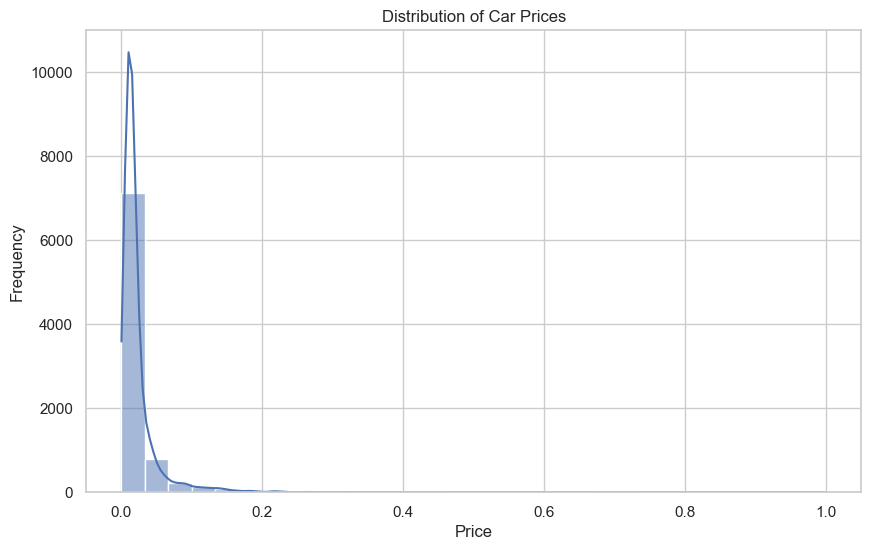

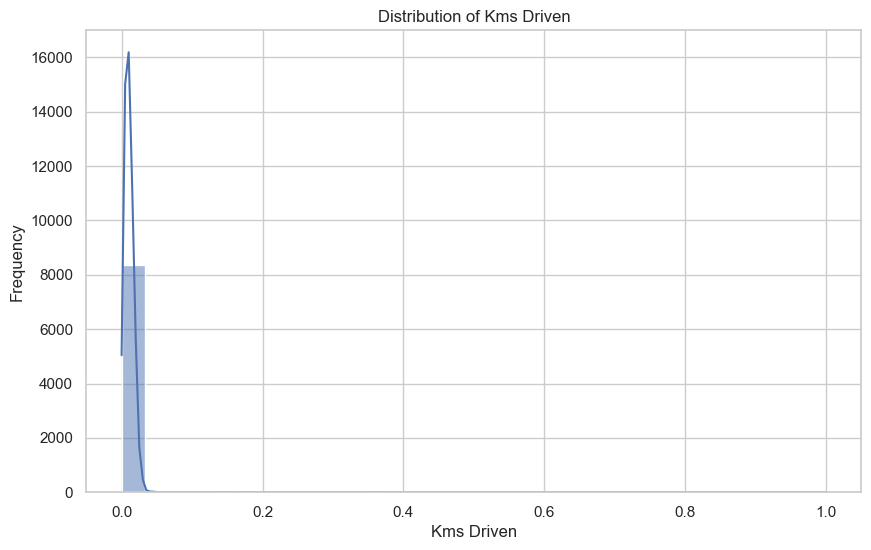

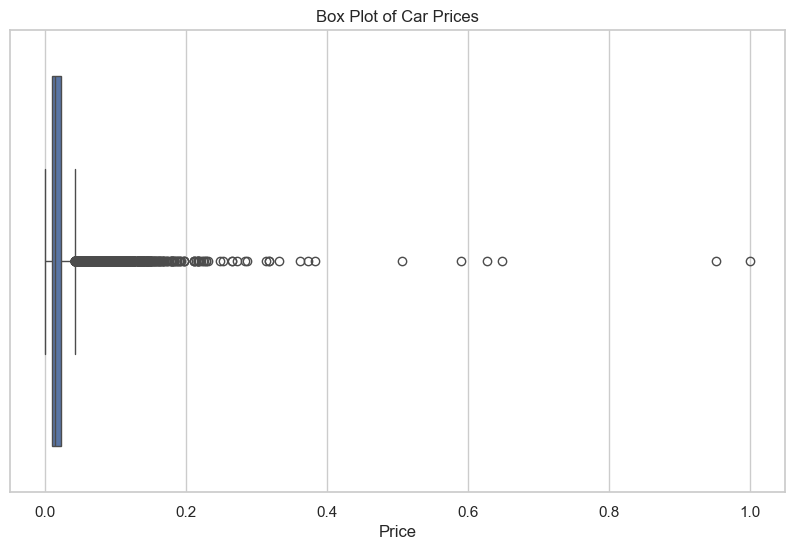

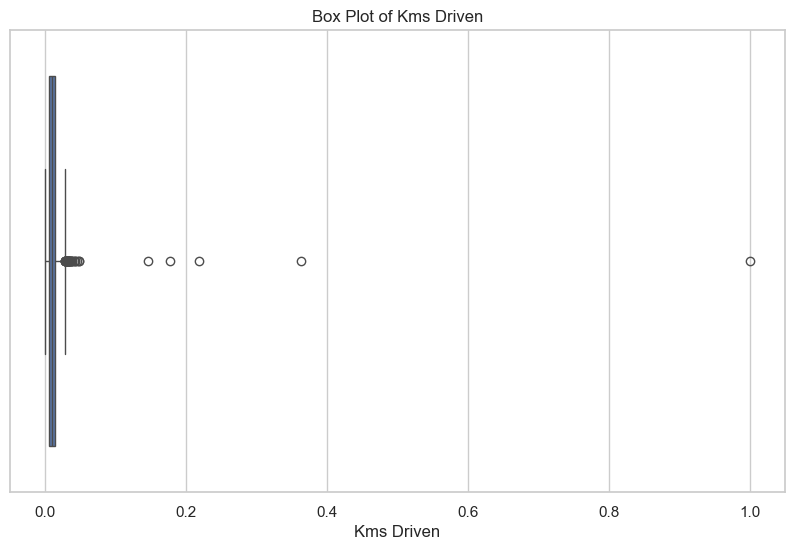

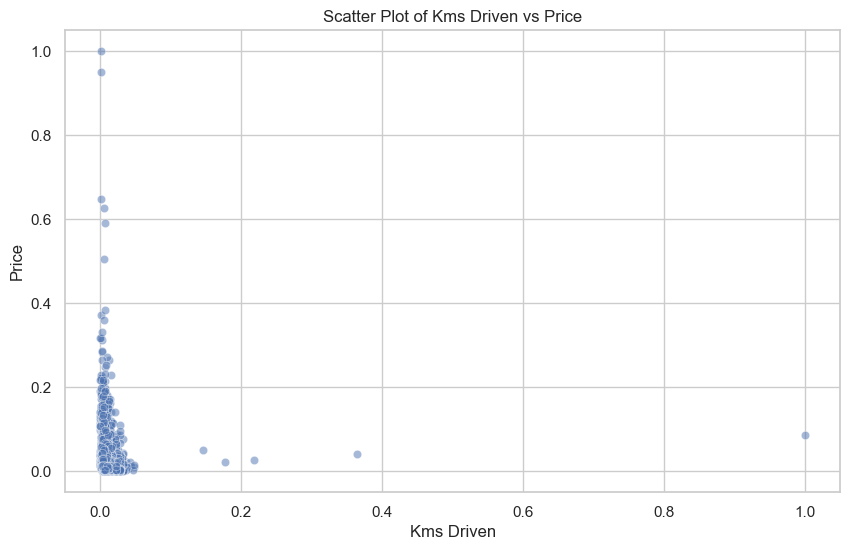

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Histogram for price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for Kms Driven
plt.figure(figsize=(10, 6))
sns.histplot(df['Kms Driven'], bins=30, kde=True)
plt.title('Distribution of Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.show()

# Box plot for price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()

# Box plot for Kms Driven
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Kms Driven'])
plt.title('Box Plot of Kms Driven')
plt.xlabel('Kms Driven')
plt.show()

# Scatter plot between Kms Driven and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kms Driven', y='price', alpha=0.5)
plt.title('Scatter Plot of Kms Driven vs Price')
plt.xlabel('Kms Driven')
plt.ylabel('Price')
plt.show()




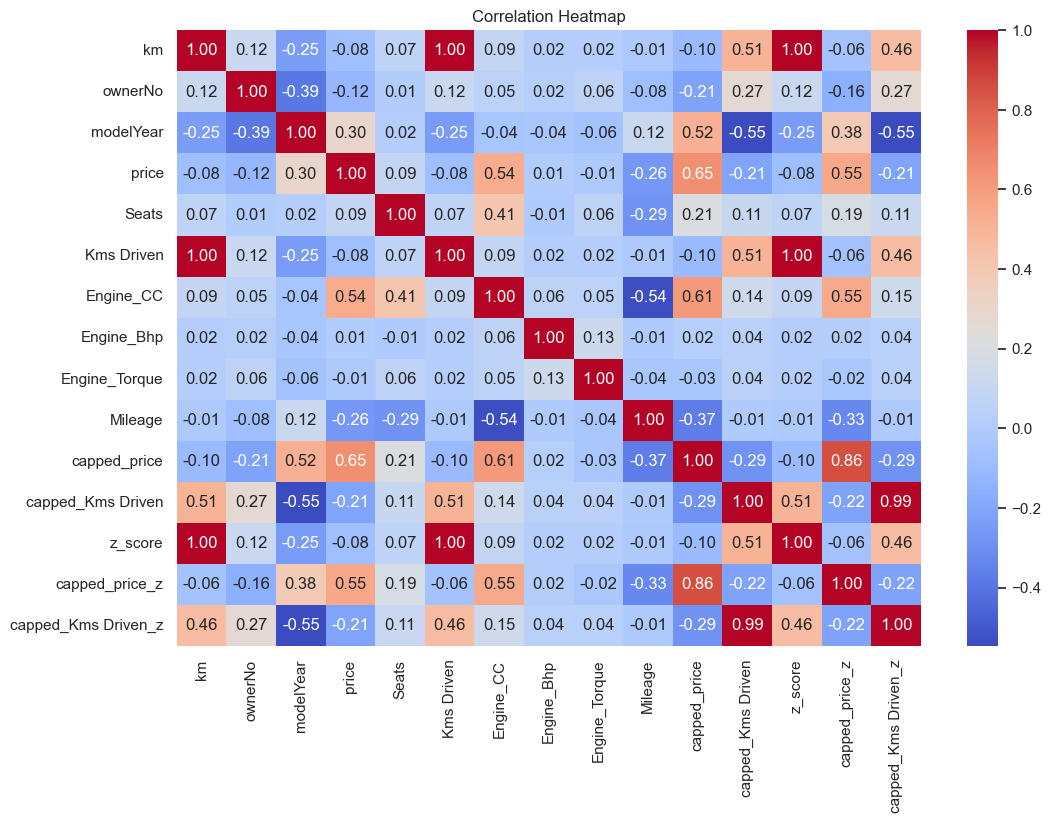

In [36]:
# Filter only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Feature Importance from Random Forest:
capped_price                                0.524533
capped_price_z                              0.266178
Engine_Bhp                                  0.060393
Engine_Torque                               0.043919
variantName_3.0 Petrol LWB Vogue SE BSIV    0.012543
                                              ...   
Color_CBeige                                0.000000
Color_CARNELIAN RED PEARL                   0.000000
Color_Burgundy Red Metallic                 0.000000
Color_Burgundy                              0.000000
variantName_ZXI Plus BSVI                   0.000000
Length: 2924, dtype: float64


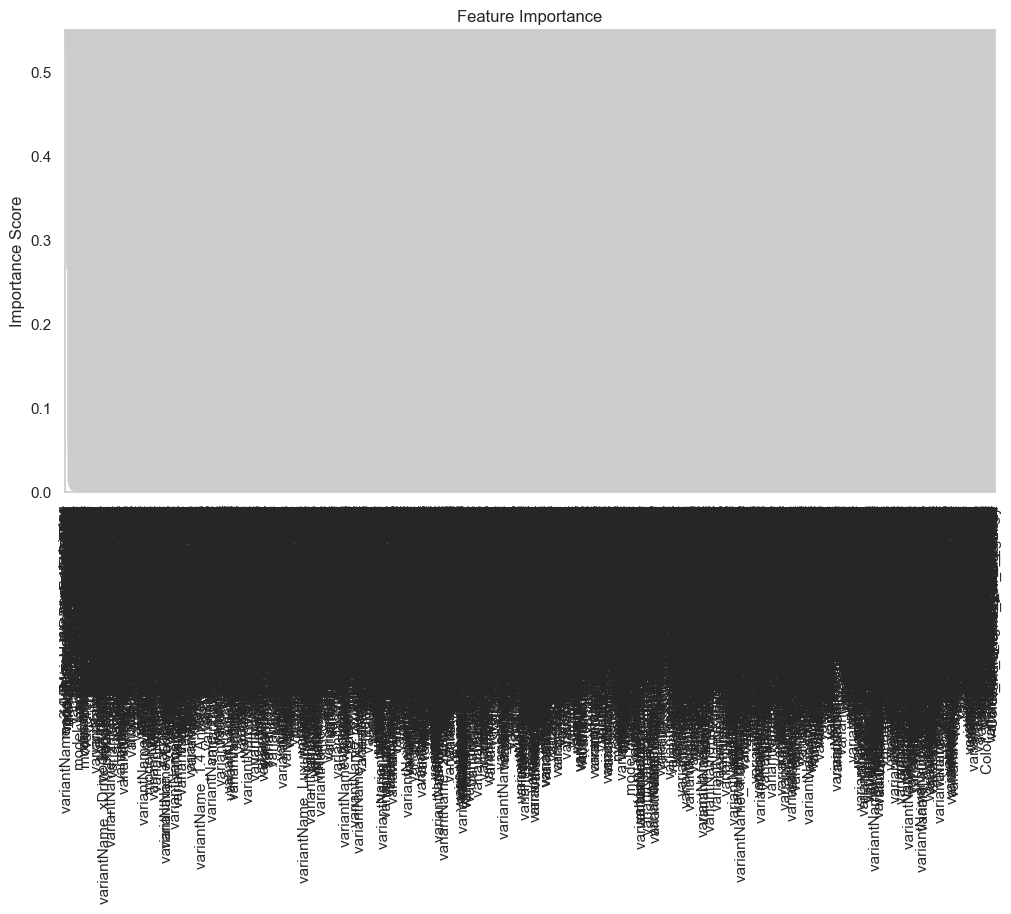

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['model', 'variantName', 'Registration Year'], drop_first=True)

# Prepare the data (drop original categorical columns)
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance from Random Forest:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()


 Model Development


Linear Regression: Mean MSE with Cross-Validation: 0.30
Decision Tree: Mean MSE with Cross-Validation: 0.00
Random Forest: Mean MSE with Cross-Validation: 0.00
Gradient Boosting: Mean MSE with Cross-Validation: 0.00
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=  11.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=  11.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=  11.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  20.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  20.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  21.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  43.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  42.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=20

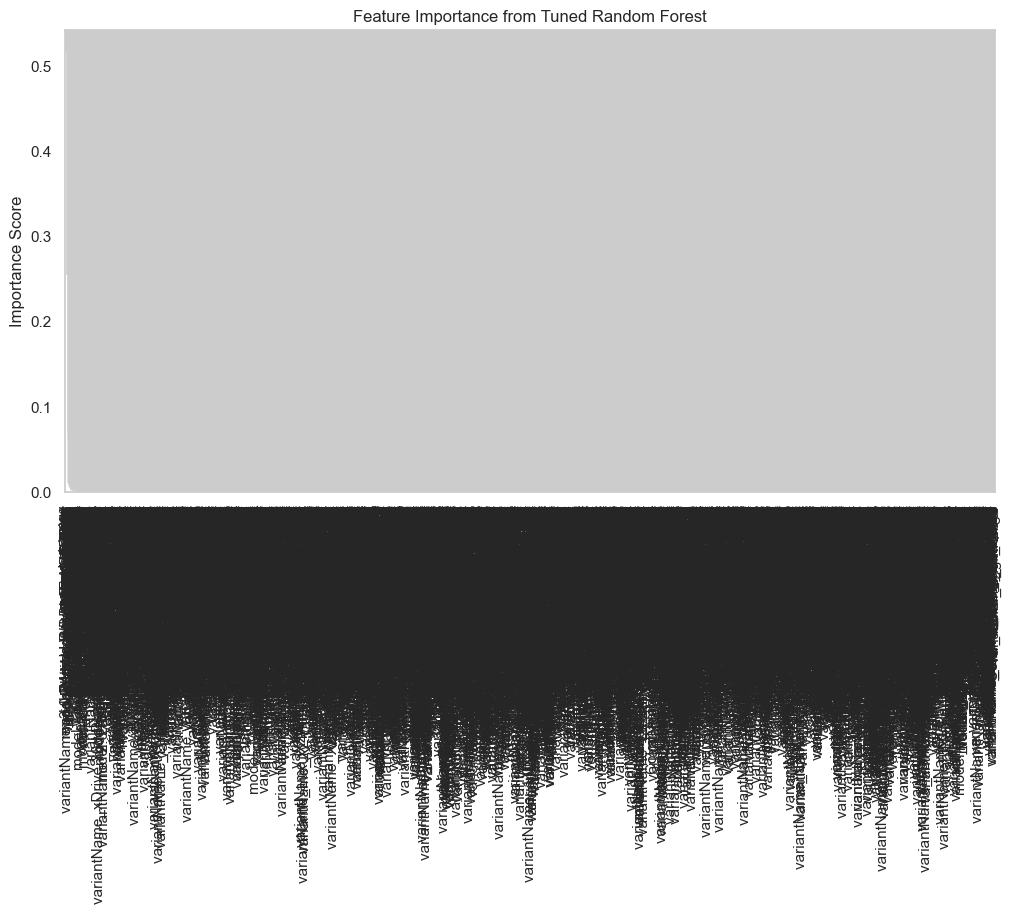

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('cleaned_df.csv')

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['model', 'variantName', 'Registration Year'], drop_first=True)

# Prepare the data (drop original categorical columns)
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: Define multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Model Training: Train each model and evaluate using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    print(f"{name}: Mean MSE with Cross-Validation: {mean_mse:.2f}")

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search for Random Forest
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Mean Squared Error from Grid Search:", -grid_search.best_score_)

# Train the best model on the entire training set
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Model Evaluation:")
print(f"Mean Squared Error: {mse_rf_tuned:.2f}")
print(f"R² Score: {r2_rf_tuned:.2f}")

# Feature Importance from the best model
feature_importance = pd.Series(best_rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance from Tuned Random Forest:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Tuned Random Forest')
plt.ylabel('Importance Score')
plt.show()


Model Evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('cleaned_df.csv')

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['model', 'variantName', 'Registration Year'], drop_first=True)

# Prepare the data (drop original categorical columns)
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: Define multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Store evaluation metrics for each model
evaluation_metrics = {}

# Model Training: Train each model and evaluate using cross-validation
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    evaluation_metrics[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search for Random Forest
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Mean Squared Error from Grid Search:", -grid_search.best_score_)

# Train the best model on the entire training set
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Model Evaluation:")
print(f"Mean Absolute Error: {mae_rf_tuned:.2f}")
print(f"Mean Squared Error: {mse_rf_tuned:.2f}")
print(f"R² Score: {r2_rf_tuned:.2f}")

# Feature Importance from the best model
feature_importance = pd.Series(best_rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance from Tuned Random Forest:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Tuned Random Forest')
plt.ylabel('Importance Score')
plt.show()

# Model Comparison Summary
comparison_df = pd.DataFrame(evaluation_metrics).T
print("\nModel Comparison:")
print(comparison_df)
